<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_3_2_2_parameter_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import sklearn.datasets as skds
import matplotlib.pyplot as plt

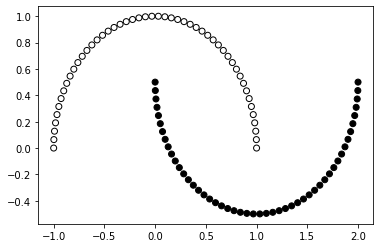

In [ ]:
X, Y = skds.make_moons(n_samples=100,random_state=1)
X    = torch.tensor(X).float()
Y    = torch.tensor(Y).float()
plt.scatter(X[:, 0], X[:, 1],
              c=Y, cmap="Greys", edgecolor="black");

def draw_prob_contours():
  x0, x1       = torch.linspace(-1, 2, 100), torch.linspace(-1, 1, 100)
  grid0, grid1 = torch.meshgrid(x0, x1)
  model_input  = torch.cartesian_prod(x0, x1)
  model_output = model(model_input).reshape(100,100).detach()
  plt.scatter(X[:, 0], X[:, 1],
            c=Y, cmap="Greys", edgecolor="black");
  fig = plt.contour(grid0,grid1,model_output,cmap="Greys");
  fig.clabel(inline=True, fontsize=10);

In [ ]:
def clip_prob(y,eps):
  eps = torch.tensor(eps)
  return torch.max(eps,torch.min(1-eps, y)) 

In [ ]:
from torch import nn
model = nn.Sequential(nn.Linear(2,10),
                      nn.ReLU(),
                      nn.Linear(10,10),
                      nn.ReLU(),
                      nn.Linear(10,1),
                      nn.Sigmoid())
print(model)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


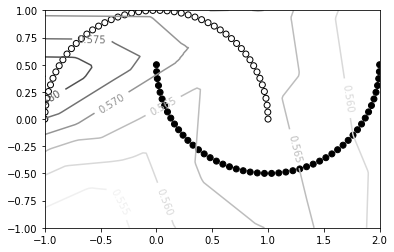

In [ ]:
draw_prob_contours()

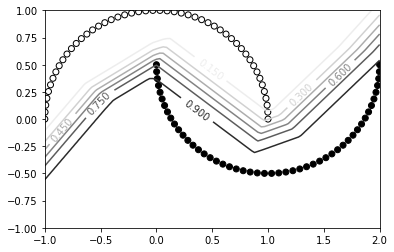

In [ ]:
for _ in range(100):
  optimizer.zero_grad()
  y_model = torch.squeeze(model(X))
  y_model_clipped = clip_prob(y_model, 10**-4)
  CE_loss = -1/len(Y)*torch.sum(Y*torch.log(y_model_clipped) + (1-Y)*torch.log(1-y_model_clipped))
  CE_loss.backward()
  optimizer.step()  
draw_prob_contours()

#Parameter Initialization

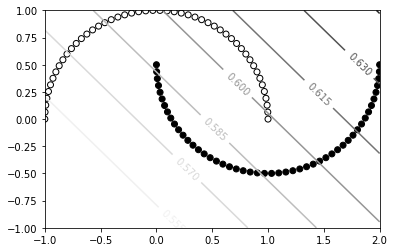

In [ ]:
for x in model.parameters():
  torch.nn.init.constant_(x, 0.1)
draw_prob_contours()

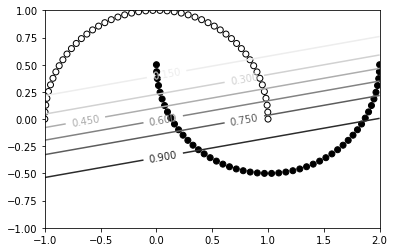

In [ ]:
for _ in range(100):
  optimizer.zero_grad()
  y_model = torch.squeeze(model(X))
  y_model_clipped = clip_prob(y_model,10**-4)
  CE_loss = -1/len(Y) * torch.sum(Y*torch.log(y_model_clipped) + (1-Y)*torch.log(1-y_model_clipped))
  CE_loss.backward()
  optimizer.step()
draw_prob_contours()

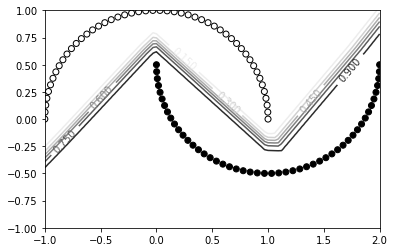

In [ ]:
for x in model:
  if hasattr(x,"reset_parameters"):
   x.reset_parameters()
for _ in range(1000):
  optimizer.zero_grad()
  y_model = torch.squeeze(model(X))
  y_model_clipped = clip_prob(y_model, 10**-4)
  CE_loss = -1/len(Y)*torch.sum(Y*torch.log(y_model_clipped) + (1-Y)*torch.log(1-y_model_clipped))
  CE_loss.backward()
  optimizer.step()
draw_prob_contours()